# Sale Analyst in an E-com business
## Task: Conduct an Anual Report
## Questions:
  1. What was the best month for sales? How much was earned that month?
  2. What city has the best sales?
  3. What time we should display ads to maximize the likelihood of customer's buying product?
  4. What products are most often sold together?
  5. What is the most sold product? Why?

**Import libraries and Read data**

In [179]:
import pandas as pd
import matplotlib.pyplot as plt
import os
# merge 12 months to 1 list
annual_files = []
for file in os.listdir():
    if file.endswith('.csv'):
        annual_files.append(file)
# print(annual_files)

# merge 12 months to 1 df
frames = []
for file in annual_files:
    df_month = pd.read_csv(file)
    frames.append(df_month)
    annual_df = pd.concat(frames)
annual_df.to_csv("Annual Sales 2019", index=False)
annual_df.info


<bound method DataFrame.info of       Order ID                   Product Quantity Ordered Price Each  \
0       141234                    iPhone                1        700   
1       141235  Lightning Charging Cable                1      14.95   
2       141236          Wired Headphones                2      11.99   
3       141237          27in FHD Monitor                1     149.99   
4       141238          Wired Headphones                1      11.99   
...        ...                       ...              ...        ...   
11681   259353    AAA Batteries (4-pack)                3       2.99   
11682   259354                    iPhone                1        700   
11683   259355                    iPhone                1        700   
11684   259356    34in Ultrawide Monitor                1     379.99   
11685   259357      USB-C Charging Cable                1      11.95   

           Order Date                         Purchase Address  
0      01/22/19 21:25          944 Wal

**Task 1: What the best month for sales? How much?**

In [180]:
# Insert month colume
annual_df['Months'] = annual_df['Order Date'].str[0:2]


In [181]:
annual_df['Months'].unique()

array(['01', nan, 'Or', '02', '10', '11', '12', '03', '04', '05', '06',
       '07', '08', '09'], dtype=object)

In [182]:
annual_df = annual_df.dropna(how="all")
annual_df = annual_df[annual_df['Months'] != 'Or']

In [183]:
# Convert Quantity Ordered and Price Each to numerical
annual_df['Quantity Ordered'] = pd.to_numeric(annual_df['Quantity Ordered'] ,downcast="integer")
annual_df['Price Each'] = pd.to_numeric(annual_df['Price Each'], downcast="float")

In [184]:
annual_df['Sales'] = annual_df['Quantity Ordered'] * annual_df['Price Each']

In [185]:
sales_months = annual_df.groupby('Months').sum()['Sales'].to_dict()
for key, val in sales_months.items():
    print(f"Month {key}: {val}")

Month 01: 1822256.75
Month 02: 2202022.5
Month 03: 2807100.25
Month 04: 3390670.25
Month 05: 3152606.75
Month 06: 2577802.25
Month 07: 2647775.75
Month 08: 2244467.75
Month 09: 2097560.0
Month 10: 3736726.75
Month 11: 3199603.25
Month 12: 4613443.5


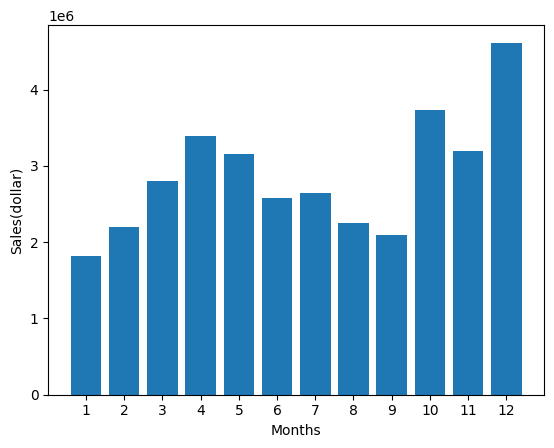

In [186]:
# Create a bar chart
months = range(1, 13)
plt.bar(x = months, height=sales_months.values())
plt.xticks(months)
plt.xlabel("Months")
plt.ylabel("Sales(dollar)")
plt.show()

**Task 2: What city has best sales?**

In [187]:
getCityLambda = lambda getCity: getCity.split(',')[1]
annual_df['Cities'] = annual_df['Purchase Address'].apply(getCityLambda)
annual_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,Sales,Cities
0,141234,iPhone,1,700.000000,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01,700.000000,Boston
1,141235,Lightning Charging Cable,1,14.950000,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01,14.950000,Portland
2,141236,Wired Headphones,2,11.990000,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01,23.980000,San Francisco
3,141237,27in FHD Monitor,1,149.990005,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01,149.990005,Los Angeles
4,141238,Wired Headphones,1,11.990000,01/25/19 11:59,"387 10th St, Austin, TX 73301",01,11.990000,Austin


In [246]:
cities_dict = annual_df.groupby("Cities")['Sales'].sum().to_dict()
for key, val in cities_dict.items():
    print(f"City{key} has sales: {val} dollar")

City Atlanta has sales: 2795498.5 dollar
City Austin has sales: 1819581.75 dollar
City Boston has sales: 3661642.0 dollar
City Dallas has sales: 2767975.5 dollar
City Los Angeles has sales: 5452571.0 dollar
City New York City has sales: 4664317.5 dollar
City Portland has sales: 2320490.5 dollar
City San Francisco has sales: 8262204.0 dollar
City Seattle has sales: 2747755.5 dollar


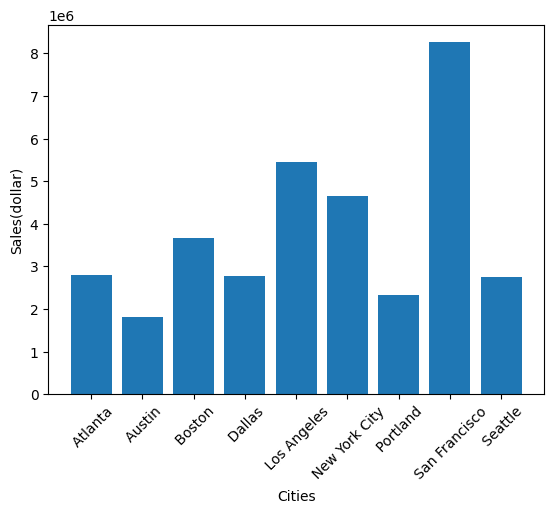

In [189]:
plt.bar(x = cities_dict.keys(), height=cities_dict.values())
plt.xticks(rotation = 45)
plt.xlabel("Cities")
plt.ylabel("Sales(dollar)")
plt.show()

**Task 3: What time we should play ads**

In [190]:
# Convert "Order Data" to date time type
annual_df['Order Date'] = pd.to_datetime(annual_df['Order Date'])
# Create Hours column
annual_df['Hours'] = annual_df['Order Date'].apply(lambda x : x.hour)

C:\Users\Thang\AppData\Local\Temp\ipykernel_14520\1048671132.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  annual_df['Order Date'] = pd.to_datetime(annual_df['Order Date'])


In [191]:
# Check number of oredered per hour
sale_quantity_per_hour = annual_df.groupby("Hours")['Quantity Ordered'].sum()
print(sale_quantity_per_hour)

Hours
0      4428
1      2619
2      1398
3       928
4       937
5      1493
6      2810
7      4556
8      7002
9      9816
10    12308
11    14005
12    14202
13    13685
14    12362
15    11391
16    11662
17    12229
18    13802
19    14470
20    13768
21    12244
22     9899
23     7065
Name: Quantity Ordered, dtype: int64


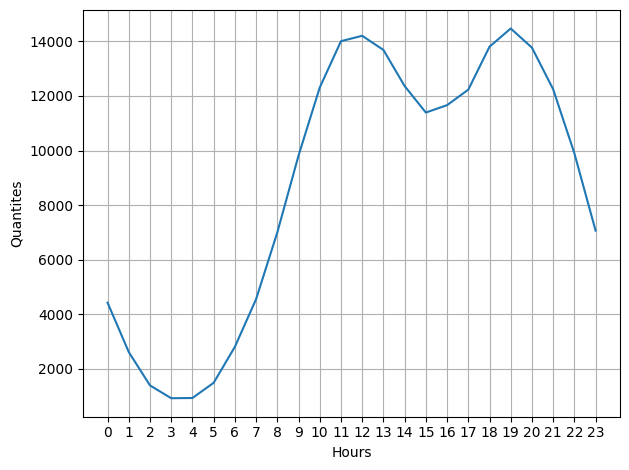

In [192]:
# Plot
hours = range(0, 24)
plt.plot(hours, sale_quantity_per_hour)
plt.xticks(hours)
plt.xlabel("Hours")
plt.ylabel("Quantites")
plt.grid()
plt.tight_layout()
plt.show()

Customer often buy at 12 and 19. Those times, they often take a break or go their home after work. So, we should play ads at those times.

**Task 4: What products are most sold together?**

In [193]:
annual_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,Sales,Cities,Hours
0,141234,iPhone,1,700.000000,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",01,700.000000,Boston,21
1,141235,Lightning Charging Cable,1,14.950000,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",01,14.950000,Portland,14
2,141236,Wired Headphones,2,11.990000,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",01,23.980000,San Francisco,13
3,141237,27in FHD Monitor,1,149.990005,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",01,149.990005,Los Angeles,20
4,141238,Wired Headphones,1,11.990000,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",01,11.990000,Austin,11


In [194]:
annual_df = annual_df[annual_df['Order ID'] != 'Order ID']

In [195]:
# Merge duplicates Order to new dataframe
df_dup = annual_df[annual_df['Order ID'].duplicated(keep=False)]
df_dup.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,Sales,Cities,Hours
41,141275,USB-C Charging Cable,1,11.95,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",01,11.95,Austin,16
42,141275,Wired Headphones,1,11.99,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",01,11.99,Austin,16
57,141290,Apple Airpods Headphones,1,150.00,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",01,150.00,Los Angeles,8
58,141290,AA Batteries (4-pack),3,3.84,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",01,11.52,Los Angeles,8
133,141365,Vareebadd Phone,1,400.00,2019-01-10 11:19:00,"20 Dogwood St, New York City, NY 10001",01,400.00,New York City,11


In [196]:
Join_Product = lambda Product: ', '.join(Product)

In [197]:
df_dup['All Products'] =  df_dup.groupby("Order ID")["Product"].transform(Join_Product);


C:\Users\Thang\AppData\Local\Temp\ipykernel_14520\2166363266.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dup['All Products'] =  df_dup.groupby("Order ID")["Product"].transform(Join_Product);


In [200]:
# Care only Order Id and All Products columns
df_dup = df_dup[['Order ID', 'All Products']].drop_duplicates()

In [206]:
df_dup['All Products'].value_counts().head(10)

All Products
iPhone, Lightning Charging Cable                        882
Google Phone, USB-C Charging Cable                      856
iPhone, Wired Headphones                                361
Vareebadd Phone, USB-C Charging Cable                   312
Google Phone, Wired Headphones                          303
iPhone, Apple Airpods Headphones                        286
Google Phone, Bose SoundSport Headphones                161
Vareebadd Phone, Wired Headphones                       104
Google Phone, USB-C Charging Cable, Wired Headphones     77
Vareebadd Phone, Bose SoundSport Headphones              60
Name: count, dtype: int64

**Task 5: What is the most sold product?**

In [219]:
product_sale =  annual_df.groupby("Product")['Quantity Ordered'].sum()
print(product_sale)

Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity Ordered, dtype: int64


In [234]:
product_price = annual_df.groupby("Product")['Price Each'].mean()
print(product_price)

Product
20in Monitor                   109.989998
27in 4K Gaming Monitor         389.990021
27in FHD Monitor               149.990005
34in Ultrawide Monitor         379.990021
AA Batteries (4-pack)            3.840000
AAA Batteries (4-pack)           2.990000
Apple Airpods Headphones       150.000000
Bose SoundSport Headphones      99.989998
Flatscreen TV                  300.000000
Google Phone                   600.000000
LG Dryer                       600.000000
LG Washing Machine             600.000000
Lightning Charging Cable        14.950000
Macbook Pro Laptop            1700.000000
ThinkPad Laptop                999.989990
USB-C Charging Cable            11.950000
Vareebadd Phone                400.000000
Wired Headphones                11.990000
iPhone                         700.000000
Name: Price Each, dtype: float32


C:\Users\Thang\AppData\Local\Temp\ipykernel_14520\1580989932.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(product_ls, rotation = 90)


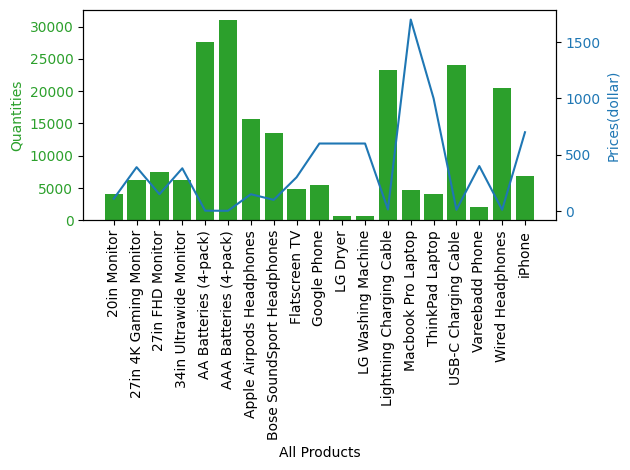

In [247]:
product_ls = [product for product, quant in product_sale.items()]

import matplotlib.pyplot as plt
import numpy as np

# Create some mock data
t = product_ls
data1 = product_sale
data2 = product_price

fig, ax1 = plt.subplots()

color = 'tab:green'
ax1.set_xlabel('All Products')
ax1.set_ylabel('Quantities', color=color)
ax1.set_xticklabels(product_ls, rotation = 90)
ax1.bar(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Prices(dollar)', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show();